<h1>Machine Learning Internship | Navia Life Care</h1>

Name: Uma T V

Email: uma.tv1699@gmail.com

Roll No: ME17B170

Institute: Indian Institute of Technology Madras

<h2>Part 1 out of 3</h2>

<h3> 01 Splitting_Component_Numbers_From_Tagged_Captchas </h3>
<p style="color:blue"> This program inputs electoral-tagged images and filenames, splits the indiviual images into the component numbers and then stores the pixel information of the split number images along with their label, which provides as a training dataset for individual number identification </p>

In [1]:
# setup

import pandas as pd
from PIL import Image
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
# a function to convert rgb to grayscale

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [3]:
# a function to load images along with their tagnames to a list 

def load_images_from_folder(folder):
    labels=[]
    images = []
    for filename in os.listdir(folder):
        img = rgb2gray(imread(os.path.join(folder,filename)))
        labels.append(filename)
        images.append(img)
    return labels,images

In [4]:
# storing the pixel values and labels of training captchas

train_labels,train_images=load_images_from_folder('electoral-tagged')

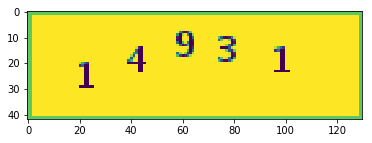

In [5]:
# visualizing one of the training images

plt.imshow(train_images[40])

In [6]:
# visualizing how it is named

train_labels[40]

'141931.png'

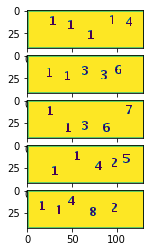

In [7]:
#visualizing few more captchas

n=5
for i in range(n):
    plt.subplot(5,1,i+1)
    plt.imshow(train_images[i])

<p style="color:blue">We notice that the captchs are quite simple, in the sense that the numbers are neither rotated nor is there noise in the images. The numbers are merely translated, with sufficient gap between one another. Hence, we donot need to use neural networks here. We can easily split the numbers using black pixel detection and classify the numbers separately.</p>


<p style="color:blue">Another reason for not using neural networks is the insufficient number of training images (only 940), and large number of test images (1500). Hence, it is best to split the numbers (then we will get 940*5 = 4200 training images which can be easily learnt by machine learning algorithms.</p>


In [8]:
#creating a dataframe with rows as the training images and columns as their corresponding pixel values

rows=12
cols=10
split_train=pd.DataFrame(columns=[i for i in range(rows*cols+1)])

<p style="color:blue">Now, we shall split the images. Splitting is done based on vertical segments of black pixels separated by vertical segments of white spaces. The standard size of individual numbers is taken to be 12*10.</p>

In [9]:
#code for splitting the numbers. 

for i in range(len(train_images)):
    df=pd.DataFrame()
    arr_prev=0
    arr=0
    break_=[]
    for j in range(train_images[i].shape[1]):
        df[j]=train_images[i][:,j]
        values=df[j].unique()
        sig=0
        for k in values:
            if(k<0.5): sig=1
        if(sig==0): arr=0
        else: arr=1
        if(arr==1 and arr_prev==0):
            if( len(break_)==0 or (j-1) > (break_[-1]+cols)): break_.append(j-1)
        arr_prev=arr
    df_list=[]
    if(len(break_)!=5): 
        print("ERRORRR")
        print(i)
    for j in range(len(break_)):
        if(break_[j]+cols>130): break_[j]=129-cols
        df_list.append(df[df.columns[break_[j]:break_[j]+cols]])
        break_row=0
        for k in range(42):
            for l in df_list[j].columns:
                if(df_list[j][l][k]<0.5):
                    break_row=k
        df_list[j]=df_list[j].loc[break_row-10:break_row+1]
    for j in range(len(df_list)):
        pixels=[]
        for k in df_list[j].columns:
            for l in df_list[j].index:
                pixels.append(df_list[j][k][l])
        pixels.append(int(train_labels[i][j]))
        temp_df=pd.DataFrame([pixels],columns=[i for i in range(rows*cols+1)])
        split_train=pd.concat([split_train,temp_df])
    if(i%50==0): print(i,"done")

0 done
50 done
100 done
150 done
200 done
250 done
300 done
350 done
400 done
450 done
500 done
550 done
600 done
650 done
700 done
750 done
800 done
850 done
900 done


(12, 10)
(12, 10)
(12, 10)
(12, 10)
(12, 10)


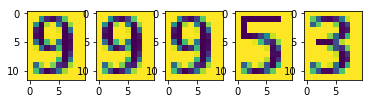

In [10]:
# visualizing split numbers

f, axarr = plt.subplots(1,5)
for i in range(len(df_list)):
    axarr[i].imshow(df_list[i].to_numpy())
    print(df_list[i].to_numpy().shape)

In [11]:
# visualizing the prepared and processed data of split numbers along with their labels

split_train

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,1
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,1
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,1
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,1
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,9
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,9
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,9
0,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,5


In [12]:
# saving the split numbers processed pixel information for further processing

split_train.to_csv("split_train.csv",index = False)